## 서울 평균 집값 추이를 알아보고 다음 해의 집값을 예측해보자.
자료 범위 : 2016년 ~ 2020년  
데이터 출처 : https://data.seoul.go.kr/dataList/OA-15548/S/1/datasetView.do

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.rcParams['font.family']='NanumGothicCoding'
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=[16,8]

In [2]:
# 서울 부동산 실거래 데이터들을 불러온다.
df_list=[]
df_list.append(pd.read_csv('./data/서울특별시_부동산_실거래가_정보_2016년.csv', encoding='euc-kr'))
df_list.append(pd.read_csv('./data/서울특별시_부동산_실거래가_정보_2017년.csv', encoding='euc-kr'))
df_list.append(pd.read_csv('./data/서울특별시_부동산_실거래가_정보_2018년.csv', encoding='euc-kr'))
df_list.append(pd.read_csv('./data/서울특별시_부동산_실거래가_정보_2019년.csv', encoding='euc-kr'))
df_list.append(pd.read_csv('./data/서울특별시_부동산_실거래가_정보_2020년.csv', encoding='euc-kr'))
df=pd.concat(df_list, axis=0)

In [3]:
# 자료를 열람하며 대략적인 데이터의 생김새 파악
df.sample(5)

,실거래가아이디,지번코드,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,물건번호,대지권면적,건물면적,관리구분코드,층정보,건물주용도코드,건물주용도,물건금액,건축년도,건물명,"실거래가아이디"""
97776,11350-2020-4-0002899-1,1135010500106660000,11350,노원구,1135010500,상계동,2020,4,신고,1,NaN,41.30,0,6.0,2001,아파트,390000000,1988.0,상계주공10(고층),NaN
143329,11215-2016-4-0000079-1,1121510300102490003,11215,광진구,1121510300,구의동,2016,4,신고,1,33.19,68.88,0,3.0,2002,연립주택,320000000,2002.0,킴스빌라,NaN
57226,NaN,1141011100104600000,11410,서대문구,1141011100,홍제동,2019,4,신고,1,0.00,84.90,0,13.0,2001,아파트,730000000,2000.0,인왕산현대,11410-2019-4-0010543-1
87141,11305-2020-4-0009935-1,1130510300102520051,11305,강북구,1130510300,수유동,2020,4,신고,1,29.12,42.70,0,1.0,2002,연립주택,108000000,1994.0,삼우아트빌라7차,NaN
149807,11470-2017-4-0003070-1,1147010100107330031,11470,양천구,1147010100,신정동,2017,4,신고,1,NaN,48.87,0,4.0,2001,아파트,205000000,1987.0,수정,NaN


In [4]:
# 주거용 건물에 대한 데이터가 맞는지, 각 년도의 데이터가 맞는지 확인
print("건물 주 용도 :", list(df.건물주용도.unique()))
print("신고 년도    :", list(df_list[4].신고년도.unique()))
print("자치구명 목록:", list(df.자치구명.unique()))

건물 주 용도 : ['단독주택', '아파트', '오피스텔', '연립주택']
신고 년도    : [2020]
자치구명 목록: ['중랑구', '영등포구', '동작구', '노원구', '성북구', '중구', '서대문구', '강서구', '광진구', '서초구', '은평구', '송파구', '강북구', '도봉구', '용산구', '성동구', '강동구', '동대문구', '마포구', '양천구', '구로구', '금천구', '관악구', '강남구', '종로구']


<AxesSubplot:>

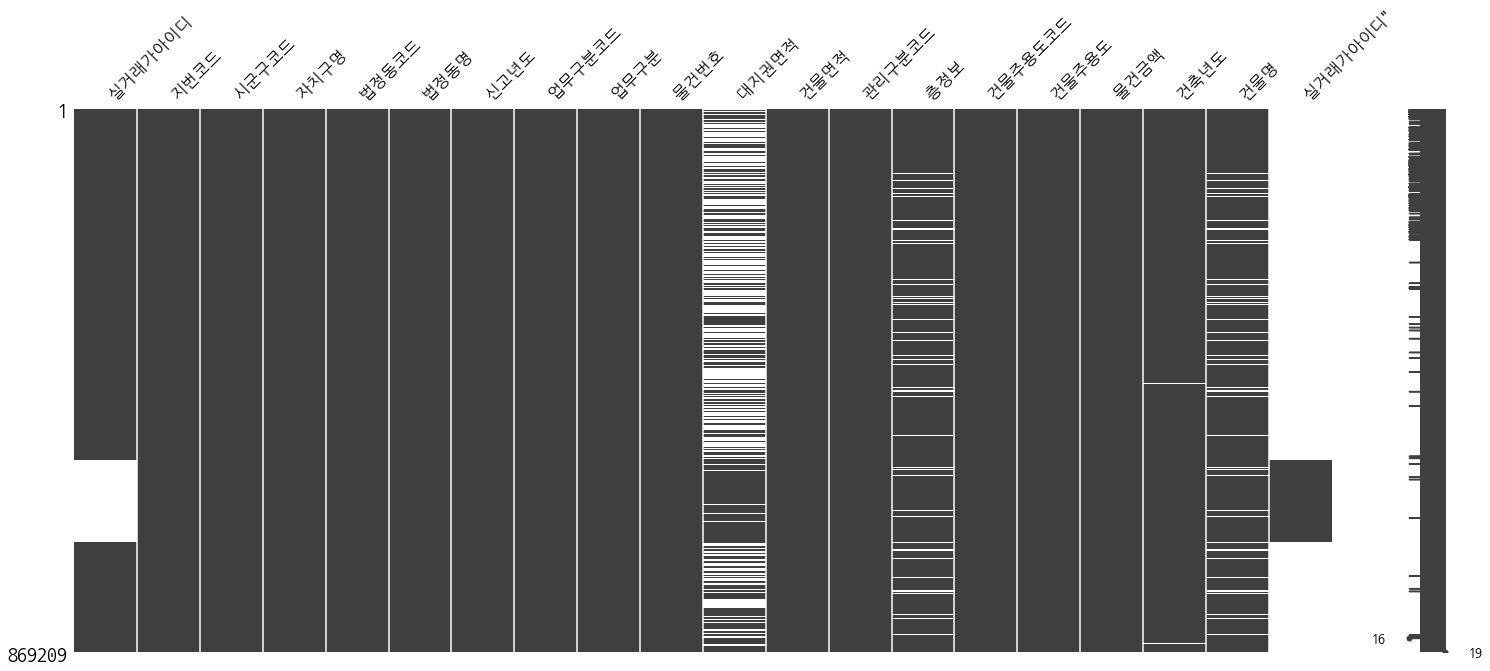

In [5]:
# 누락값(하얀 줄)이 있는지 확인.
# 관심 있는 데이터는 자치구명, 신고년도, 물건금액이다.
# 관심 있는 부분에는 누락이 없음을 확인한다.
msno.matrix(df)

In [6]:
# 관심 있는 데이터만 남기고 나머지는 제거해준다.
# 또한 물건금액 단위를 만 단위로 바꿔 수치를 줄여준다.
for i in range(len(df_list)):
    df_list[i]=df_list[i].loc[:,['자치구명', '신고년도', '물건금액']]
    df_list[i].물건금액//=1e+4
df=df.loc[:,['자치구명', '신고년도', '물건금액']]
df.물건금액//=1e+4

In [7]:
# 데이터의 범위를 보고 이상치를 확인한다.
df.물건금액.sort_values()

196925        350.0
11777        1100.0
93228        1172.0
93229        1233.0
12989        1290.0
            ...    
36571     2100000.0
39088     2230000.0
114170    2828840.0
35336     2900000.0
85063     2914000.0
Name: 물건금액, Length: 869209, dtype: float64

<AxesSubplot:xlabel='자치구명', ylabel='물건금액'>

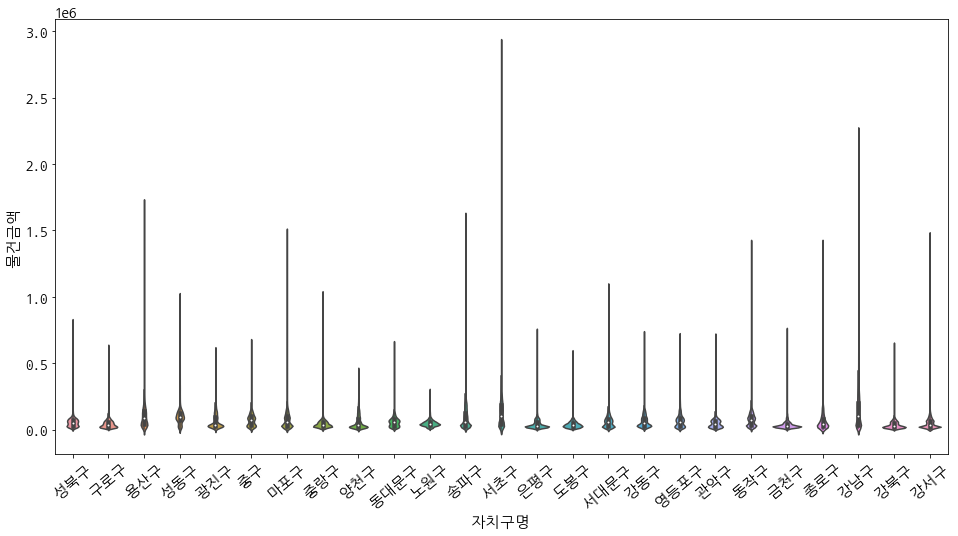

In [8]:
# violinplot으로 시각화하여 데이터의 분포와 이상치를 더 쉽게 파악한다.
plt.xticks(rotation=40)
sns.violinplot(data=df_list[4], x='자치구명', y='물건금액')

In [9]:
# 이상치(너무 높거나 낮은 가격 데이터)는 잘못된 데이터일 가능성이 있으며,
# 집값에 관심을 갖는 보통 사람들의 상식에 부합하지 않는 주거지의 데이터일 가능성도 크므로 제거한다.
# 각 연도에 대해 이상치의 기준이 다를 수 있으므로 연도별로 처리해준다.

for i in range(len(df_list)):
    price=df_list[i].groupby('자치구명').물건금액
    q1=price.quantile(q=0.25)
    q3=price.quantile(q=0.75)
    IQR=q3-q1

    minimum=q1-1.5*IQR
    minimum=pd.DataFrame(minimum).reset_index()
    minimum.columns=['자치구명', '하한']
    minimum.하한=minimum.하한.astype(int)

    maximum=q3+1.5*IQR
    maximum=pd.DataFrame(maximum).reset_index()
    maximum.columns=['자치구명', '상한']
    maximum.상한=maximum.상한.astype(int)

    dftemp=df_list[i].merge(minimum, left_on='자치구명', right_on='자치구명').merge(maximum, left_on='자치구명', right_on='자치구명')
    dftemp=dftemp[(dftemp.물건금액>=dftemp.하한) & (dftemp.물건금액<=dftemp.상한)]
    df_list[i]=dftemp.iloc[:,:3]

# 이상치가 제거된 DataFrame들을 다시 형태에 맞게 정리해준다.   
df=pd.concat(df_list, axis=0)

<AxesSubplot:xlabel='자치구명', ylabel='물건금액'>

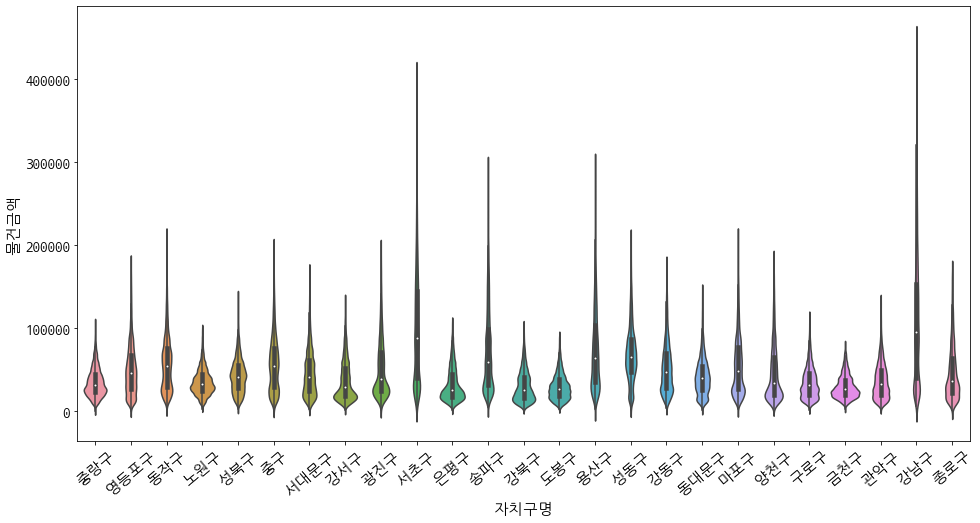

In [10]:
# 다시 한 번 시각화한다. 값의 분포에서 이상치가 제거되었음을 확인한다.
plt.xticks(rotation=40)
sns.violinplot(data=df, x='자치구명', y='물건금액')

In [11]:
# 아래는 연도별, 자치구별 평균 집값이다. (단위 : 만원)
df_pivot=df.pivot_table('물건금액', '자치구명', '신고년도')
df_pivot=df_pivot.reset_index()
df_pivot.columns.name=''
df_pivot

,자치구명,2016,2017,2018,2019,2020
0,강남구,83414.787113,99468.617058,111171.659279,139142.906507,126829.436647
1,강동구,44313.179658,50470.986311,52340.555817,59715.085340,61055.342914
2,강북구,27634.099778,28181.281516,31142.937161,31349.574059,33895.322508
3,강서구,32993.767809,34321.306395,37811.961074,36272.402638,43992.904015
4,관악구,31101.813095,33259.743482,37470.689570,40274.617567,45511.882410
5,광진구,43913.573750,47228.096349,53800.325336,56931.142589,59651.329505
6,구로구,30177.479523,31962.802829,35016.486830,37841.362467,41109.488673
7,금천구,29705.652442,29824.121477,30261.709849,29486.760056,30936.864069
8,노원구,29050.994495,31317.065717,35616.836801,39129.390825,46078.137337
9,도봉구,25589.035095,27664.771132,30204.079818,30910.331297,36785.655463


In [12]:
# 서울 전체적인 집값 상승률을 확인한다.
mean_prices=df.groupby('신고년도').물건금액.mean()
rise_rate=mean_prices.iloc[-1]/mean_prices.iloc[0]-1.0
print('서울 평균 집값 상승률 (2016년 ~ {}년) : {:.2%}'.format(2015+len(df_list), rise_rate))

서울 평균 집값 상승률 (2016년 ~ 2020년) : 38.26%


In [13]:
# 위에서 구한 데이터를 바탕으로 선형회귀분석을 시행하여 2021년 자치구별 평균 집값 예측치를 계산한다.
df_temp=df_pivot.iloc[:,1:]
df_temp=df_temp.T
df_temp['x']=range(len(df_list))

grad= df_temp.cov().iloc[-1,:-1]/df_temp['x'].var()
bias= df_temp.mean() - grad*df_temp['x'].sum()/len(df_list)

pred_2021=(grad*len(df_list)+bias)[:-1]
df_pivot_pred=df_pivot.copy()
df_pivot_pred[2021]=pred_2021
df_pivot_pred

,자치구명,2016,2017,2018,2019,2020,2021
0,강남구,83414.787113,99468.617058,111171.659279,139142.906507,126829.436647,149956.557876
1,강동구,44313.179658,50470.986311,52340.555817,59715.085340,61055.342914,66397.557670
2,강북구,27634.099778,28181.281516,31142.937161,31349.574059,33895.322508,35147.864405
3,강서구,32993.767809,34321.306395,37811.961074,36272.402638,43992.904015,44263.278982
4,관악구,31101.813095,33259.743482,37470.689570,40274.617567,45511.882410,48274.253039
5,광진구,43913.573750,47228.096349,53800.325336,56931.142589,59651.329505,64658.460830
6,구로구,30177.479523,31962.802829,35016.486830,37841.362467,41109.488673,43544.297446
7,금천구,29705.652442,29824.121477,30261.709849,29486.760056,30936.864069,30680.540128
8,노원구,29050.994495,31317.065717,35616.836801,39129.390825,46078.137337,48798.468273
9,도봉구,25589.035095,27664.771132,30204.079818,30910.331297,36785.655463,37922.414831


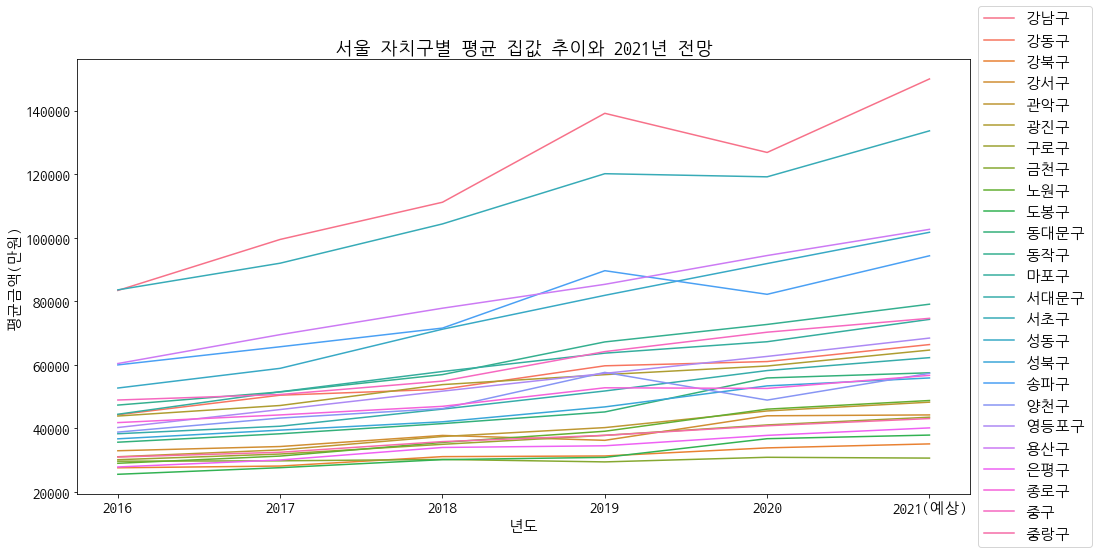

In [14]:
# 서울 자치구별 평균 집값 추이와 2021년 집값 예측치를 시각화한다.
df_melt=pd.melt(df_pivot_pred, id_vars='자치구명')
df_melt.columns=['자치구명', '년도', '평균금액(만원)']

plt.title("서울 자치구별 평균 집값 추이와 2021년 전망")
plt.rcParams['figure.figsize']=[14,8]

g=sns.lineplot(data=df_melt, x='년도', y='평균금액(만원)', hue='자치구명')
g.set_xticklabels(['']+[str(i) for i in range(2016, 2016+len(df_list))]+[str(2016+len(df_list))+'(예상)'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))